In [1]:
import pyhf
import numpy as np
import matplotlib.pyplot as plt 
import decorrelate

In [2]:
bins = np.arange(11)
bin_cents = (bins[1:]+bins[:-1])/2

hist1 = np.array([1.5, 3., 6., 7.5, 6.3, 6.6, 5.5, 2.5, 3. , 1.5])
hist1_err = np.array([0.4 , 0.4 , 0.3 , 0.2 , 0.15, 0.4 , 0.45, 0.5 , 0.3 , 0.35])
hist2 = np.array([3. , 6., 9., 12., 15., 9. , 6., 3. , 3.3, 2.15])
hist2_err = np.array([1. , 1. , 3. , 2. , 2., 1. , 2., 2. , 1. , 1.])


data = np.array([ 4, 17, 26, 23, 34, 23, 21,  7,  8,  4])

In [3]:
samples = [
    {
        "name": "sample1",
        "data": list(hist2/2),
        "modifiers": [
            {"name": "mu1", "type": "normfactor", "data" : None},
            {
                "name": "hun1",
                "type": "histosys",
                "data": {
                    "lo_data": list(hist2/2 - hist1/2),
                    "hi_data": list(hist2/2 + hist1/2)
                }
            }
        ],
    },
    {
        "name": "sample2",
        "data": list(hist2/2),
        "modifiers": [
            {"name": "mu2", "type": "normfactor", "data" : None},
            {
                "name": "hun1",
                "type": "histosys",
                "data": {
                    "lo_data": list(hist2/2 - hist1/2),
                    "hi_data": list(hist2/2 + hist1/2)
                }
            }
        ],
    },
]
spec = {"channels" : [{"name" : "singlechannel", "samples" : samples}]}

# info: the `poi_name=None` is nescessary here since we don't want to do a hypothesis test
model = pyhf.Model(spec, poi_name=None)

[1, 1.0, 1.0]


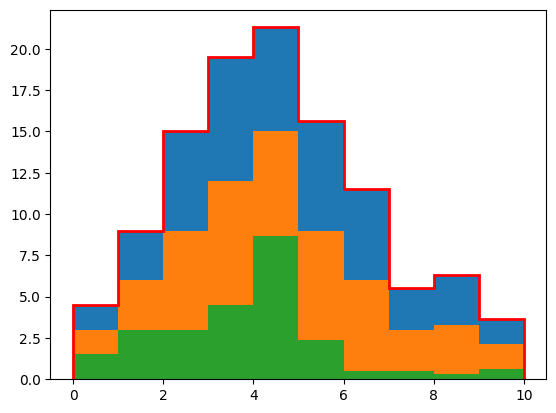

In [4]:
plt.stairs(hist1+hist2, bins, baseline=hist2, fill = True)
plt.stairs(hist2, bins, fill=True)
plt.stairs(hist2-hist1, bins, fill=True)


initial_parameters = model.config.suggested_init()
initial_parameters[0] = 1
# initial_parameters[1] = 1

plt.stairs(model.expected_data(initial_parameters, include_auxdata=False), bins, linewidth=2, color='r')
# plt.errorbar(bin_cents, model.config.auxdata, yerr=np.sqrt(model.config.auxdata), fmt='o')
print(initial_parameters)


# Correlations within sample

In [5]:
# add correlated parameters to pyhf model
samples = [
    {
        "name": "sample1",
        "data": list(hist2),
        "modifiers": [
            {"name": "mu", "type": "normfactor", "data" : None},
            {
                "name": "u1",
                "type": "histosys",
                "data": {
                    "lo_data": list(hist2-hist1),
                    "hi_data": list(hist2+hist1)
                }
            },
            {
                "name": "u2",
                "type": "histosys",
                "data": {
                    "lo_data": list(hist2-hist2),
                    "hi_data": list(hist2+hist2)
                }
            }
        ],
        
    },
]
spec = {"channels" : [{"name" : "singlechannel", "samples" : samples}]}
model = pyhf.Model(spec)


In [6]:
spec = {
    "channels" : [{"name" : "singlechannel", "samples" : samples}], 
    "correlations": [
        {
            "name": "corr",
            "vars": ["u1", "u2"],
            "corr": [[1., 1.], [1., 1.]],
        }
    ]}
new_spec = decorrelate.decorrelate(spec)
new_model = pyhf.Model(new_spec)
new_spec

correlation found


{'channels': [{'name': 'singlechannel',
   'samples': [{'name': 'sample1',
     'data': [3.0, 6.0, 9.0, 12.0, 15.0, 9.0, 6.0, 3.0, 3.3, 2.15],
     'modifiers': [{'name': 'mu', 'type': 'normfactor', 'data': None},
      {'name': 'corr[0]',
       'type': 'histosys',
       'data': {'lo_data': [7.5,
         15.0,
         24.0,
         31.499999999999996,
         36.3,
         24.599999999999998,
         17.5,
         8.5,
         9.599999999999998,
         5.799999999999999],
        'hi_data': [-1.5,
         -3.0,
         -5.999999999999998,
         -7.4999999999999964,
         -6.299999999999997,
         -6.599999999999998,
         -5.499999999999998,
         -2.499999999999999,
         -2.999999999999999,
         -1.4999999999999996]}},
      {'name': 'corr[1]',
       'type': 'histosys',
       'data': {'lo_data': [3.0,
         6.0,
         9.0,
         12.0,
         15.0,
         9.0,
         6.0,
         3.0,
         3.3,
         2.15],
        'hi_data'

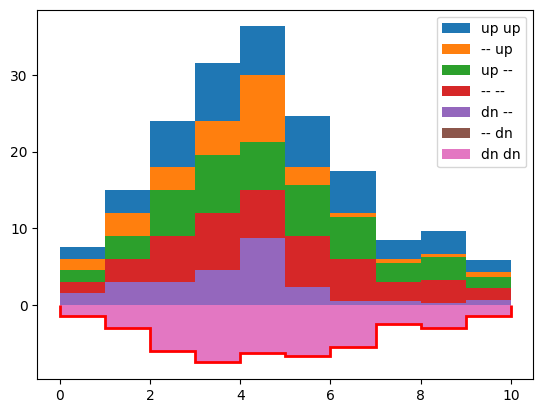

In [7]:
plt.stairs(hist2+hist1+hist2, bins, fill = True, label = 'up up')
plt.stairs(hist2+hist2, bins, fill = True, label = '-- up')
plt.stairs(hist2+hist1, bins, fill = True, label = 'up --')
plt.stairs(hist2, bins, fill=True, label = '-- --')
plt.stairs(hist2-hist1, bins, fill=True, label = 'dn --')
plt.stairs(hist2-hist2, bins, fill=True, label = '-- dn')
plt.stairs(hist2-hist1-hist2, bins, fill=True, label = 'dn dn')

initial_parameters = new_model.config.suggested_init()
initial_parameters[0] = 1.
initial_parameters[1] = 0.

plt.stairs(new_model.expected_data(initial_parameters, include_auxdata=False), bins, linewidth=2, color='r')

plt.legend()

# Correlations across samples

In [8]:
# add correlated parameters to pyhf model
samples = [
    {
        "name": "sample1",
        "data": list(hist1),
        "modifiers": [
            {"name": "mu", "type": "normfactor", "data" : None},
            {
                "name": "u1",
                "type": "histosys",
                "data": {
                    "lo_data": list(hist1-hist1),
                    "hi_data": list(hist1+hist1)
                }
            }
        ],
        
    },    
    {
        "name": "sample2",
        "data": list(hist2),
        "modifiers": [
            {
                "name": "u2",
                "type": "histosys",
                "data": {
                    "lo_data": list(hist2-hist1),
                    "hi_data": list(hist2+hist1)
                }
            }
        ],
        
    },
    
]
spec = {"channels" : [{"name" : "corrchannel", "samples" : samples}]}
model = pyhf.Model(spec)


In [12]:
spec = {
    "channels" : [{"name" : "singlechannel", "samples" : samples}], 
    "correlations": [
        {
            "name": "corr",
            "vars": ["u1", "u2"],
            "corr": [[1., 1.], [1., 1.]],
        }
    ]}
new_spec = decorrelate.decorrelate(spec)
new_model = pyhf.Model(new_spec)
new_spec

correlation found


{'channels': [{'name': 'singlechannel',
   'samples': [{'name': 'sample1',
     'data': [1.5, 3.0, 6.0, 7.5, 6.3, 6.6, 5.5, 2.5, 3.0, 1.5],
     'modifiers': [{'name': 'mu', 'type': 'normfactor', 'data': None},
      {'name': 'corr[0]',
       'type': 'histosys',
       'data': {'lo_data': [2.9999999999999996,
         5.999999999999999,
         11.999999999999998,
         14.999999999999996,
         12.599999999999998,
         13.199999999999998,
         10.999999999999998,
         4.999999999999999,
         5.999999999999999,
         2.9999999999999996],
        'hi_data': [4.440892098500626e-16,
         8.881784197001252e-16,
         1.7763568394002505e-15,
         2.6645352591003757e-15,
         1.7763568394002505e-15,
         1.7763568394002505e-15,
         1.7763568394002505e-15,
         8.881784197001252e-16,
         8.881784197001252e-16,
         4.440892098500626e-16]}},
      {'name': 'corr[1]',
       'type': 'histosys',
       'data': {'lo_data': [1.5, 3.0,

In [13]:
new_model.config.par_map

{'corr[0]': {'slice': slice(0, 1, None),
  'paramset': <pyhf.parameters.paramsets.constrained_by_normal at 0x7f2b8d6506a0>},
 'corr[1]': {'slice': slice(1, 2, None),
  'paramset': <pyhf.parameters.paramsets.constrained_by_normal at 0x7f2b8d650970>},
 'mu': {'slice': slice(2, 3, None),
  'paramset': <pyhf.parameters.paramsets.unconstrained at 0x7f2b8d6509a0>}}

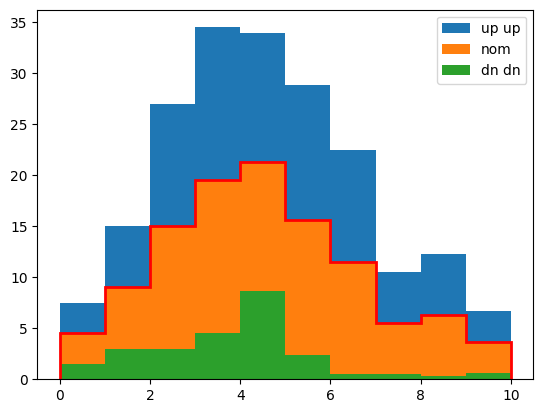

In [14]:
plt.stairs(hist2+hist1+hist1+hist1, bins, fill = True, label = 'up up')
# plt.stairs(hist2+hist2, bins, fill = True, label = '-- up')
plt.stairs(hist2+hist1, bins, fill = True, label = 'nom')
# plt.stairs(hist2, bins, fill=True, label = '-- --')
plt.stairs(hist2-hist1 + hist1 - hist1, bins, fill=True, label = 'dn dn')
# plt.stairs(hist2-hist2, bins, fill=True, label = '-- dn')
# plt.stairs(hist2-hist1-hist2, bins, fill=True, label = 'dn dn')

initial_parameters = new_model.config.suggested_init()
initial_parameters[0] = 0.
initial_parameters[1] = 100.

plt.stairs(new_model.expected_data(initial_parameters, include_auxdata=False), bins, linewidth=2, color='r')

plt.legend()